In [3]:
file = open("doc13.txt", encoding='utf-8')
text = file.read()
file.close()
text

'He argued closer co-operation with Europe over asylum and immigration was crucial to controlling the flow of people into the UK.\nGraphic design has picked up trends in recent years.\nHe accused the government of being "pathetic" when it came to its efforts over immigration and asylum and of "surrendering" on the issue.\nDark chocolate’s potential health benefits certainly don’t give you a free pass to overindulge.\nWorking at the intersection of art and technology, a savvy graphic designer creates imagery—typography, special effects, photos, drawings, and the like—that sells and strengthens ideas.\nDark chocolate is the most nutritious form of chocolate.\n'

In [4]:
import re
pattern = '\n'
corpus = re.split(pattern, text)
corpus = corpus[:-1]
corpus

['He argued closer co-operation with Europe over asylum and immigration was crucial to controlling the flow of people into the UK.',
 'Graphic design has picked up trends in recent years.',
 'He accused the government of being "pathetic" when it came to its efforts over immigration and asylum and of "surrendering" on the issue.',
 'Dark chocolate’s potential health benefits certainly don’t give you a free pass to overindulge.',
 'Working at the intersection of art and technology, a savvy graphic designer creates imagery—typography, special effects, photos, drawings, and the like—that sells and strengthens ideas.',
 'Dark chocolate is the most nutritious form of chocolate.']

In [5]:
import nltk
import numpy as np 
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # remove special characters
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords 
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus


array(['argued closer cooperation europe asylum immigration crucial controlling flow people uk',
       'graphic design picked trends recent years',
       'accused government pathetic came efforts immigration asylum surrendering issue',
       'dark chocolates potential health benefits certainly dont give free pass overindulge',
       'working intersection art technology savvy graphic designer creates imagerytypography special effects photos drawings likethat sells strengthens ideas',
       'dark chocolate nutritious form chocolate'], dtype='<U149')

In [6]:
# words bag
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
cv = CountVectorizer(min_df=0.0, max_df=1.0)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names()

pd.DataFrame(cv_matrix, columns=vocab)

C:\Users\rozhk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,accused,argued,art,asylum,benefits,came,certainly,chocolate,chocolates,closer,...,savvy,sells,special,strengthens,surrendering,technology,trends,uk,working,years
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,0,1,0,0,1,0
5,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# words bag with n-grams (unigrams)
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
cv = CountVectorizer(min_df=0., max_df=1., ngram_range=(1,1))
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names()

data = pd.DataFrame(cv_matrix, columns=vocab)

C:\Users\rozhk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
data["chocolate"].T

0    0
1    0
2    0
3    0
4    0
5    2
Name: chocolate, dtype: int64

In [9]:
# words bag with n-grams (bigrams)
cv = CountVectorizer(min_df=0., max_df=1., ngram_range=(2,2))
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names()

pd.DataFrame(cv_matrix, columns=vocab)

C:\Users\rozhk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,accused government,argued closer,art technology,asylum immigration,asylum surrendering,benefits certainly,came efforts,certainly dont,chocolate nutritious,chocolates potential,...,potential health,recent years,savvy graphic,sells strengthens,special effects,strengthens ideas,surrendering issue,technology savvy,trends recent,working intersection
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,0,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# last vector about chocolate
pd.DataFrame(cv_matrix[-1:], columns=vocab)

,accused government,argued closer,art technology,asylum immigration,asylum surrendering,benefits certainly,came efforts,certainly dont,chocolate nutritious,chocolates potential,...,potential health,recent years,savvy graphic,sells strengthens,special effects,strengthens ideas,surrendering issue,technology savvy,trends recent,working intersection
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
# show document feature vectors
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)


C:\Users\rozhk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,accused,argued,art,asylum,benefits,came,certainly,chocolate,chocolates,closer,...,savvy,sells,special,strengthens,surrendering,technology,trends,uk,working,years
0,0.00,0.31,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.31,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.00,0.42
2,0.35,0.00,0.00,0.28,0.00,0.35,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.31,0.00,0.31,0.00,0.31,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.24,0.24,0.24,0.24,0.00,0.24,0.00,0.00,0.24,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.77,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


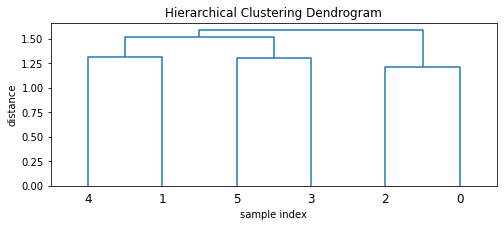

In [12]:
# clastering documents with ierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
# compute cosinus distance matrix
dist = cosine_similarity(tv_matrix)
# show distance matrix
pd.DataFrame(dist)

# compute linkage matrix
links = linkage(dist, 'ward')
# show linkage matrix
pd.DataFrame(links, columns=['Document\Cluster 1', 'Document\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')

plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(links, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()




In [13]:
from scipy.cluster.hierarchy import fcluster
max_d = 1.5
clusters = fcluster(links, max_d, criterion='distance')
# show norm_corpus and clusters
pd.DataFrame({'Document': norm_corpus, 'Cluster': clusters})

,Document,Cluster
0,argued closer cooperation europe asylum immigr...,1
1,graphic design picked trends recent years,3
2,accused government pathetic came efforts immig...,1
3,dark chocolates potential health benefits cert...,2
4,working intersection art technology savvy grap...,3
5,dark chocolate nutritious form chocolate,2


In [14]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]
w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=100,window=30, min_count=1,sample=1e-3)

similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term],topn=15)]
for search_term in ['immigration', 'chocolate']}
pd.DataFrame(similar_words)

,immigration,chocolate
0,savvy,accused
1,benefits,form
2,surrendering,imagerytypography
3,pathetic,ideas
4,health,immigration
5,chocolate,government
6,design,special
7,uk,cooperation
8,trends,picked
9,working,dont
